In [1]:
#choose a big n, then try to do everything. 

In [2]:
#pay attention to increasing number of classes. Track the performance of your oracle. 

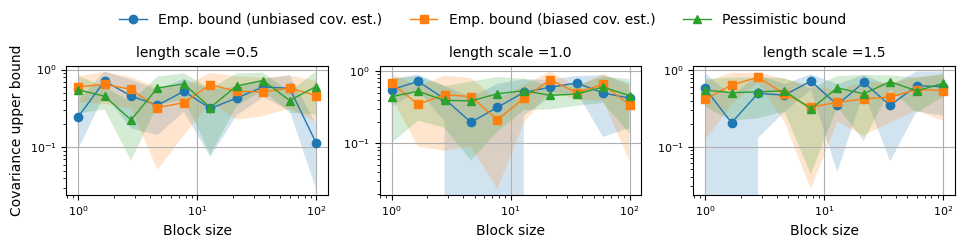

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def plot_OU_tau(ax, pess_bound, data_bound_biased_cov_est, data_bound_unbiased_cov_est, taus, n, delta, length_scale, show_ylabel=False):
    pess_bound_mean = np.mean(pess_bound, axis=-1)
    pess_bound_std = np.std(pess_bound, axis=-1)

    data_bound_biased_est_mean = np.mean(data_bound_biased_cov_est, axis=-1)
    data_bound_biased_est_std = np.std(data_bound_biased_cov_est, axis=-1)

    data_bound_unbiased_est_mean = np.mean(data_bound_unbiased_cov_est, axis=-1)
    data_bound_unbiased_est_std = np.std(data_bound_unbiased_cov_est, axis=-1)

    # Plot with appropriate figure size and font sizes
    line1, = ax.loglog(taus, data_bound_unbiased_est_mean, marker='o', label="Emp. bound (unbiased cov. est.)", linewidth=1)
    ax.fill_between(taus, data_bound_unbiased_est_mean - data_bound_unbiased_est_std, 
                    data_bound_unbiased_est_mean + data_bound_unbiased_est_std, alpha=0.2)

    line2, = ax.loglog(taus, data_bound_biased_est_mean, marker='s', label="Emp. bound (biased cov. est.)", linewidth=1)
    ax.fill_between(taus, data_bound_biased_est_mean - data_bound_biased_est_std, 
                    data_bound_biased_est_mean + data_bound_biased_est_std, alpha=0.2)

    line3, = ax.loglog(taus, pess_bound_mean, marker='^', label="Pessimistic bound", linewidth=1)
    ax.fill_between(taus, pess_bound_mean - pess_bound_std, 
                    pess_bound_mean + pess_bound_std, alpha=0.2)

    ax.set_xlabel("Block size", fontsize=10)
    if show_ylabel:
        ax.set_ylabel("Covariance upper bound", fontsize=10)
    ax.set_title(f"length scale ={length_scale}", fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.grid(True)
    
    return line1, line2, line3

# Example data (replace with your actual data)
taus = np.logspace(0, 2, 10)
delta = 0.1
length_scales = [0.5, 1.0, 1.5]
pess_bounds = [np.random.rand(10, 5) for _ in length_scales]
data_bounds_biased = [np.random.rand(10, 5) for _ in length_scales]
data_bounds_unbiased = [np.random.rand(10, 5) for _ in length_scales]

# Create a figure with 3 subplots in a row, single-column width (3.25 inches)
fig, axes = plt.subplots(1, 3, figsize=(3.25 * 3, 2.5))  # Adjust height as needed for visibility

# Plot each subplot and collect lines for the legend
lines = []
for i, length_scale in enumerate(length_scales):
    show_ylabel = (i == 0)  # Only show y-axis label on the first subplot
    lines += plot_OU_tau(axes[i], pess_bounds[i], data_bounds_biased[i], data_bounds_unbiased[i], taus, n=100, delta=delta, length_scale=length_scale, show_ylabel=show_ylabel)

# Create a common legend
labels = ["Emp. bound (unbiased cov. est.)", "Emp. bound (biased cov. est.)", "Pessimistic bound"]
fig.legend(lines[:3], labels, loc='upper center', fontsize=10, ncol=3, frameon=False)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.subplots_adjust(top=0.75)  # Add more space between title and legend
plt.savefig("OU_Exp_tau_different_length_scales_NeurIPS.pdf", format="pdf", dpi=600)
plt.show()


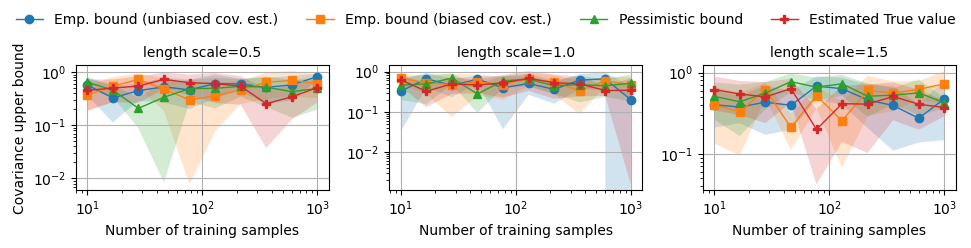

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def plot_OU2(ax, pess_bound, data_bound_biased_cov_est, data_bound_unbiased_cov_est, True_value, Ns, delta, length_scale, show_ylabel=False):
    pess_bound_mean = np.mean(pess_bound, axis=-1)
    pess_bound_std = np.std(pess_bound, axis=-1)

    data_bound_biased_est_mean = np.mean(data_bound_biased_cov_est, axis=-1)
    data_bound_biased_est_std = np.std(data_bound_biased_cov_est, axis=-1)

    data_bound_unbiased_est_mean = np.mean(data_bound_unbiased_cov_est, axis=-1)
    data_bound_unbiased_est_std = np.std(data_bound_unbiased_cov_est, axis=-1)

    true_value_mean = np.mean(True_value, axis=-1)
    true_value_std = np.std(True_value, axis=-1)

    # Plot with appropriate figure size and font sizes
    line1, = ax.loglog(Ns, data_bound_unbiased_est_mean, marker='o', label="Emp. bound (unbiased cov. est.)", linewidth=1)
    ax.fill_between(Ns, data_bound_unbiased_est_mean - data_bound_unbiased_est_std, 
                    data_bound_unbiased_est_mean + data_bound_unbiased_est_std, alpha=0.2)

    line2, = ax.loglog(Ns, data_bound_biased_est_mean, marker='s', label="Emp. bound (biased cov. est.)", linewidth=1)
    ax.fill_between(Ns, data_bound_biased_est_mean - data_bound_biased_est_std, 
                    data_bound_biased_est_mean + data_bound_biased_est_std, alpha=0.2)

    line3, = ax.loglog(Ns, pess_bound_mean, marker='^', label="Pessimistic bound", linewidth=1)
    ax.fill_between(Ns, pess_bound_mean - pess_bound_std, 
                    pess_bound_mean + pess_bound_std, alpha=0.2)
    
    line4, = ax.loglog(Ns, true_value_mean, marker='P', label="Estimated True value", linewidth=1)
    ax.fill_between(Ns, true_value_mean - true_value_std, 
                    true_value_mean + true_value_std, alpha=0.2)

    ax.set_xlabel("Number of training samples", fontsize=10)
    if show_ylabel:
        ax.set_ylabel("Covariance upper bound", fontsize=10)
    ax.set_title(f"length scale={length_scale}", fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.grid(True)
    
    return line1, line2, line3, line4

# Example data (replace with your actual data)
Ns = np.logspace(1, 3, 10)
delta = 0.1
length_scales = [0.5, 1.0, 1.5]
pess_bounds = [np.random.rand(10, 5) for _ in length_scales]
data_bounds_biased = [np.random.rand(10, 5) for _ in length_scales]
data_bounds_unbiased = [np.random.rand(10, 5) for _ in length_scales]
true_values = [np.random.rand(10, 5) for _ in length_scales]

# Create a figure with 3 subplots in a row, single-column width (3.25 inches)
fig, axes = plt.subplots(1, 3, figsize=(3.25 * 3, 2.5))  # Adjust height as needed for visibility

# Plot each subplot and collect lines for the legend
lines = []
for i, length_scale in enumerate(length_scales):
    show_ylabel = (i == 0)  # Only show y-axis label on the first subplot
    lines += plot_OU2(axes[i], pess_bounds[i], data_bounds_biased[i], data_bounds_unbiased[i], true_values[i], Ns, delta, length_scale, show_ylabel=show_ylabel)

# Create a common legend
labels = ["Emp. bound (unbiased cov. est.)", "Emp. bound (biased cov. est.)", "Pessimistic bound", "Estimated True value"]
fig.legend(lines[:4], labels, loc='upper center', fontsize=10, ncol=4, frameon=False)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.subplots_adjust(top=0.75)  # Add more space between title and legend
plt.savefig("OU_Exp_different_length_scales_NeurIPS.pdf", format="pdf", dpi=900)
plt.show()


In [1]:
import importlib

for module in ['kooplearn', 'datasets', 'matplotlib', 'ml-confs']: # !! Add here any additional module that you need to install on top of kooplearn
    try:
        importlib.import_module(module)
    except ImportError:
        if module == 'kooplearn':
            module = 'kooplearn[full]'
        %pip install -q {module}

import data_pipeline
import ml_confs
from datasets import load_from_disk
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import lightning
from typing import Optional, NamedTuple
import logging
from kooplearn.abc import TrainableFeatureMap
from kooplearn.models import Linear, Nonlinear, Kernel
from kooplearn.models.feature_maps.nn import NNFeatureMap
from kooplearn.nn.data import collate_context_dataset
from kooplearn.nn import DPLoss, VAMPLoss
from kooplearn.data import traj_to_contexts
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import  ParameterGrid
from tqdm import tqdm
from torch.utils.data import random_split

Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch.nn as nn
import torch

#Setting up the architecture
class CNNEncoder(nn.Module):
    def __init__(self, num_classes):
        super(CNNEncoder, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # Fully connected layer, output num_classes classes
        self.out = nn.Sequential(
            nn.Linear(32 * 7 * 7, num_classes)
        )  
        torch.nn.init.orthogonal_(self.out[0].weight)      
    
    def forward(self, X):
        if X.dim() == 3:
            X = X.unsqueeze(1) # Add a channel dimension if needed
        X = self.conv1(X)
        X = self.conv2(X)
        # Flatten the output of conv2
        X = X.view(X.size(0), -1)       
        output = self.out(X)
        return output

In [3]:
from kooplearn.abc import TrainableFeatureMap

import os
from typing import Optional, NamedTuple
import logging

import lightning
import numpy as np

class Metrics(NamedTuple):
    train_acc: list[float]
    train_steps: list[float]
    val_acc: list[float]
    val_steps: list[float]


#Following kooplearn implementations, we define a Pytorch Lightning module and then wrap it in a TrainableFeatureMap
class ClassifierModule(lightning.LightningModule):
    def __init__(self, num_classes: int, learning_rate: float):
        super().__init__()
        self.num_classes = num_classes
        self.encoder = CNNEncoder(num_classes=num_classes)
        self.learning_rate = learning_rate
        self.loss_fn = torch.nn.CrossEntropyLoss()
    
    def on_fit_start(self):
        self.metrics = Metrics([], [], [], [])

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr = self.learning_rate)
        return optimizer
    
    def training_step(self, batch, batch_idx):
        images, labels = batch['image'], batch['label']
        output = self.encoder(images)               
        loss = self.loss_fn(output, labels)
        with torch.no_grad():
            pred_labels = output.argmax(dim=1)
            accuracy = (pred_labels == labels).float().mean()
        
        #Log metrics
        self.metrics.train_acc.append(accuracy.item())
        self.metrics.train_steps.append(self.global_step)
        
        return {'loss': loss, 'train/accuracy': accuracy}
    
    def validation_step(self, batch, batch_idx):
        images, labels = batch['image'], batch['label']
        output = self.encoder(images)  
        pred_labels = output.argmax(dim=1)
        accuracy = (pred_labels == labels).float().mean() # Scalar

        self.metrics.val_acc.append(accuracy.item())
        self.metrics.val_steps.append(self.global_step)

        return {'val/accuracy': accuracy}
    
class ClassifierFeatureMap(TrainableFeatureMap):
    def __init__(
                self, 
                num_classes: int,
                learning_rate: float,
                trainer: lightning.Trainer,
                seed: Optional[int] = None  
                ):
        #Set rng seed
        lightning.seed_everything(seed)
        self.seed = seed
        self.lightning_module = ClassifierModule(num_classes, learning_rate)
        
        #Init trainer
        self.lightning_trainer = trainer
        self._is_fitted = False
        
    @property
    def is_fitted(self) -> bool:
        return self._is_fitted
    
    @property
    def lookback_len(self) -> int:
        return 1 #Hardcoding it here, as we are not using lookback windows
    
    #Not tested
    def save(self, path: os.PathLike):
        raise NotImplementedError
    
    #Not tested
    @classmethod
    def load(cls, path: os.PathLike):
       raise NotImplementedError

    def fit(self, **trainer_fit_kwargs: dict):
        if 'model' in trainer_fit_kwargs:
            logging.warn(f"The 'model' keyword should not be specified in trainer_fit_kwargs. The provided model '{trainer_fit_kwargs['model']}' is ignored.")
            trainer_fit_kwargs = trainer_fit_kwargs.copy()
            del trainer_fit_kwargs['model']
        self.lightning_trainer.fit(model=self.lightning_module, **trainer_fit_kwargs)
        self._is_fitted = True

    def __call__(self, X: np.ndarray) -> np.ndarray:
        X = torch.from_numpy(X.copy(order="C")).float()
        self.lightning_module.eval()
        with torch.no_grad():
            embedded_X = self.lightning_module.encoder(
                X.to(self.lightning_module.device)
            )
            embedded_X = embedded_X.detach().cpu().numpy()
        return embedded_X

In [4]:
def make_block_matrices(matrix, tau):
    n = matrix.shape[0]
    assert n % tau == 0, "Matrix dimensions must be divisible by tau"

    n_blocks = n // tau
    blocks = matrix.reshape(n_blocks, tau, n_blocks, tau)
    block_matrix_result = blocks.transpose(0, 2, 1, 3)
    
    return block_matrix_result

In [5]:
def biased_covariance_estimator(cov_mtx, tau):
    n = cov_mtx.shape[0]
    block_cov_matrix = make_block_matrices(cov_mtx,tau)
    diag_blocks = torch.diagonal(torch.from_numpy(block_cov_matrix), offset=0, dim1=0, dim2=1)
    return torch.sum(torch.pow(diag_blocks,2))/(n*tau)

def unbiased_covariance_estimator(cov_mtx, tau):
    n = cov_mtx.shape[0]
    m = n / (2*tau)
    block_cov_matrix = make_block_matrices(cov_mtx,tau)
    block_cov_matrix = torch.from_numpy(block_cov_matrix)

    diag_blocks = torch.diagonal(block_cov_matrix, offset=0, dim1=0, dim2=1)
    plus_term = torch.sum(torch.pow(diag_blocks,2))
    minus_term = 0
    for signed in [1,-1]:
        for i in range(2,n, 2):
            diag_blocks = torch.diagonal(block_cov_matrix, offset=i*signed, dim1=0, dim2=1)
            minus_term += torch.sum(torch.pow(diag_blocks,2)) 
    
    # print(plus_term, minus_term)
    sum = plus_term - (minus_term / (m-1))
    if sum < 0:
        sum = 0.0

    return sum /(n*tau)

In [6]:
from kooplearn.abc import BaseModel

def evaluate_model(model: BaseModel, test_data):
    assert model.is_fitted
    report = {
        'accuracy': [],
        'accuracy_ordered':[],
        'label': [],
        'image': [],
        'times': []
    }
    for t in range(1, 20):#configs.eval_up_to_t + 1):
        pred = (model.predict(test_data, t=t)).reshape(-1, 28,28) # Shape of the lookforward window
        pred_labels = oracle(pred).argmax(axis=1)
        new_test_labels = np.array(list(test_labels[t:]) + list((test_labels[-t:] + t)% configs.classes))
        accuracy = (pred_labels == new_test_labels).mean() 
        accuracy_ordered =  (pred_labels == (test_labels + t)% configs.classes).mean()
        report['accuracy'].append(accuracy)
        report['accuracy_ordered'].append(accuracy_ordered)
        report['image'].append(pred)
        report['label'].append(pred_labels)
        report['times'].append(t)
    return report

In [ ]:
delta = 0.05
tau = 25
configs = ml_confs.from_file('configs.yaml') # Load configs
data_pipeline.main() # Run data download and preprocessing
ordered_MNIST = load_from_disk('__data__') # Load dataset (torch)
Noisy_ordered_MNIST = load_from_disk('__data__Noisy') # Load dataset (torch)


new_train_dataset = Noisy_ordered_MNIST['train'].select(list(range(100)))
train_data = traj_to_contexts(new_train_dataset['image'], backend='numpy')
gauss_kernel = RBF(length_scale=784)
kernel_model = Kernel(gauss_kernel, reduced_rank=True, rank = configs.classes, tikhonov_reg = 7.85e-3).fit(train_data)
fm_linear = new_train_dataset['image'].numpy().reshape(100, -1)
print(fm_linear.shape)
kernel_mtx = kernel_model._kernel(fm_linear, fm_linear)
kernel_matrix = gauss_kernel(fm_linear, fm_linear)

In [25]:
biased_covariance_estimator(kernel_matrix, tau= tau), unbiased_covariance_estimator(kernel_matrix, tau= tau)

(tensor(0.9998, dtype=torch.float64), tensor(6.9744e-06, dtype=torch.float64))

In [26]:
np.sum(np.around(kernel_matrix, decimals=4))

9999.0622

In [11]:
# tsCV = TimeSeriesSplit(n_splits=2, max_train_size= configs.n_train_points)
tikhonov_regs = np.geomspace(1e-8, 1e-1, 20)
length_scales = np.geomspace(1e-8, 1e2, 20)
params = list(
    ParameterGrid(
        { 
            'tikhonov_reg': tikhonov_regs, 
            'length_scale': length_scales,
        }
    )
)
backend = 'cpu'

In [2]:
configs = ml_confs.from_file('configs.yaml') # Load configs
random.seed(configs.rng_seed)
np.random.seed(configs.rng_seed)
torch.manual_seed(configs.rng_seed)
device = 'gpu' if torch.cuda.is_available() else 'cpu'

data_pipeline.main() # Run data download and preprocessing
ordered_MNIST = load_from_disk('__data__') # Load dataset (torch)
Noisy_ordered_MNIST = load_from_disk('__data__Noisy') # Load dataset (torch)

Data directory not found, preprocessing data.


Found cached dataset mnist (/Users/erfanmirzaei/.cache/huggingface/datasets/mnist/mnist/1.0.0/9d494b7f466d6931c64fb39d58bb1249a4d85c9eb9865d9bc20960b999e2a332)


  0%|          | 0/2 [00:00<?, ?it/s]

Loading cached processed dataset at /Users/erfanmirzaei/.cache/huggingface/datasets/mnist/mnist/1.0.0/9d494b7f466d6931c64fb39d58bb1249a4d85c9eb9865d9bc20960b999e2a332/cache-30c3cbd2945b7152_*_of_00008.arrow
Loading cached processed dataset at /Users/erfanmirzaei/.cache/huggingface/datasets/mnist/mnist/1.0.0/9d494b7f466d6931c64fb39d58bb1249a4d85c9eb9865d9bc20960b999e2a332/cache-f70f43711646bedd_*_of_00008.arrow
Loading cached processed dataset at /Users/erfanmirzaei/.cache/huggingface/datasets/mnist/mnist/1.0.0/9d494b7f466d6931c64fb39d58bb1249a4d85c9eb9865d9bc20960b999e2a332/cache-6e8abe4e0c0e3a6b_*_of_00008.arrow
Loading cached processed dataset at /Users/erfanmirzaei/.cache/huggingface/datasets/mnist/mnist/1.0.0/9d494b7f466d6931c64fb39d58bb1249a4d85c9eb9865d9bc20960b999e2a332/cache-ea27976e772a29ef_*_of_00008.arrow
Loading cached processed dataset at /Users/erfanmirzaei/.cache/huggingface/datasets/mnist/mnist/1.0.0/9d494b7f466d6931c64fb39d58bb1249a4d85c9eb9865d9bc20960b999e2a332/cache

Saving the dataset (0/1 shards):   0%|          | 0/800 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1001 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/201 [00:00<?, ? examples/s]

Loading cached processed dataset at /Users/erfanmirzaei/.cache/huggingface/datasets/mnist/mnist/1.0.0/9d494b7f466d6931c64fb39d58bb1249a4d85c9eb9865d9bc20960b999e2a332/cache-14fb29250c0cdfc8_*_of_00002.arrow
Loading cached processed dataset at /Users/erfanmirzaei/.cache/huggingface/datasets/mnist/mnist/1.0.0/9d494b7f466d6931c64fb39d58bb1249a4d85c9eb9865d9bc20960b999e2a332/cache-84fcb082404378c7_*_of_00002.arrow
Loading cached processed dataset at /Users/erfanmirzaei/.cache/huggingface/datasets/mnist/mnist/1.0.0/9d494b7f466d6931c64fb39d58bb1249a4d85c9eb9865d9bc20960b999e2a332/cache-8a4cbf3794d0b938_*_of_00002.arrow


Saving the dataset (0/1 shards):   0%|          | 0/800 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1001 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/201 [00:00<?, ? examples/s]

In [4]:
Noisy_ordered_MNIST['train']['image'].shape

torch.Size([800, 28, 28])

In [ ]:
configs = ml_confs.from_file('configs.yaml') # Load configs
random.seed(configs.rng_seed)
np.random.seed(configs.rng_seed)
torch.manual_seed(configs.rng_seed)
device = 'gpu' if torch.cuda.is_available() else 'cpu'

data_pipeline.main() # Run data download and preprocessing
ordered_MNIST = load_from_disk('__data__') # Load dataset (torch)
Noisy_ordered_MNIST = load_from_disk('__data__Noisy') # Load dataset (torch)
data = torch.cat((Noisy_ordered_MNIST['train']['image'], Noisy_ordered_MNIST['validation']['image']), dim=0)
error = np.empty((len(params), 2))
for iter_idx, iterate in tqdm(enumerate(params), total=len(params)):      
    _err = []
    for i in range(configs.n_repits):
        train_data, validation_data = random_split(data, [int(0.8*configs.train_samples), int(0.2*configs.train_samples)])
        train_data = traj_to_contexts(train_data, backend='numpy')
        val_data = traj_to_contexts(validation_data, backend='numpy')
        test_data = traj_to_contexts(Noisy_ordered_MNIST['test']['image'], backend='numpy')
        # test_labels = np.take(Noisy_ordered_MNIST['test']['label'], np.squeeze(test_data.__idxmap__[:, 0])).detach().cpu().numpy()
        test_labels = np.take(Noisy_ordered_MNIST['test']['label'], np.squeeze(test_data.idx_map.lookback(1))).detach().cpu().numpy()

        try :
            model = Kernel(RBF(length_scale= iterate['length_scale']), reduced_rank=True, rank = configs.classes, tikhonov_reg = iterate['tikhonov_reg']).fit(train_data)
            _err.append(model.risk(val_data))
        except: 
            _err.append(np.inf)

    _err = np.array(_err)
    error[iter_idx, 0] = np.mean(_err)
    error[iter_idx, 1] = np.std(_err)

In [ ]:
Ns = [500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000]
n_0 = len(Ns)
delta = 0.05
tau = 25
configs = ml_confs.from_file('configs.yaml') # Load configs
device = 'gpu' if torch.cuda.is_available() else 'cpu'

biased_cov_ests = {'Linear' : np.empty((n_0, configs.n_repits)),
                   'Gaussian_RRR':np.empty((n_0, configs.n_repits)),
                   'Classifier_Baseline':np.empty((n_0, configs.n_repits)),
                   'DPNets':np.empty((n_0, configs.n_repits))}

unbiased_cov_ests = {'Linear' : np.empty((n_0, configs.n_repits)),
                   'Gaussian_RRR':np.empty((n_0, configs.n_repits)),
                   'Classifier_Baseline':np.empty((n_0, configs.n_repits)),
                   'DPNets':np.empty((n_0, configs.n_repits))}

lower_bound = np.empty((n_0, configs.n_repits))

random.seed(configs.rng_seed)
np.random.seed(configs.rng_seed)
torch.manual_seed(configs.rng_seed)

for i in range(configs.n_repits):  
    
    data_pipeline.main() # Run data download and preprocessing
    configs = ml_confs.from_file('configs.yaml') # Load configs
    ordered_MNIST = load_from_disk('__data__') # Load dataset (torch)
    Noisy_ordered_MNIST = load_from_disk('__data__Noisy') # Load dataset (torch)
    for j in range(len(Ns)):
        n = Ns[j]
        # for tau in range(1,n):
        #     if delta >= 2*(n/(2*tau) - 1)*np.exp(-(np.exp(1) -  1)/np.exp(1)*tau) and (n / tau) % 2 == 0 :
        #         min_tau = tau
        #         break
        # tau = min_tau 
        oracle_train_dl = DataLoader(ordered_MNIST['train'].select(range(n)), batch_size=configs.batch_size, shuffle=True)
        oracle_val_dl = DataLoader(ordered_MNIST['validation'].select(range(n//5)), batch_size=len(ordered_MNIST['validation']), shuffle=False)
                
        trainer_kwargs = {
            'accelerator': device,
            'max_epochs': 20,
            'log_every_n_steps': 2,
            'enable_progress_bar': False,
            'devices': 1
        }

        trainer = lightning.Trainer(**trainer_kwargs)

        oracle = ClassifierFeatureMap(
            configs.classes,
            1e-2,
            trainer, 
            seed=configs.rng_seed
        )

        oracle.fit(train_dataloaders=oracle_train_dl, val_dataloaders=oracle_val_dl)
        print(oracle.lightning_module.metrics.val_acc[-1])
        new_train_dataset = Noisy_ordered_MNIST['train'].select(list(range(n)))
        new_val_dataset = Noisy_ordered_MNIST['validation'].select(range(n//5))
        train_data = traj_to_contexts(new_train_dataset['image'], backend='numpy')
        val_data = traj_to_contexts(new_val_dataset['image'], backend='numpy')
        test_data = traj_to_contexts(Noisy_ordered_MNIST['test']['image'], backend='numpy')
        test_labels = np.take(Noisy_ordered_MNIST['test']['label'], np.squeeze(test_data.idx_map.lookback(1))).detach().cpu().numpy()

        transfer_operator_models = {}
        
        linear_model = Linear(reduced_rank = configs.reduced_rank, rank=configs.classes, tikhonov_reg = 48.33).fit(train_data)
        transfer_operator_models['Linear'] = linear_model 
        
        classifier_model = Nonlinear(oracle, reduced_rank=False, rank=configs.classes).fit(train_data)
        transfer_operator_models['Classifier_Baseline'] = classifier_model

        kernel_model = Kernel(RBF(length_scale=784), reduced_rank=True, rank = configs.classes, tikhonov_reg = 7.85e-3).fit(train_data)
        transfer_operator_models['Gaussian_RRR'] = kernel_model    
        
        train_dl = DataLoader(train_data, batch_size = configs.batch_size, shuffle=True, collate_fn=collate_context_dataset)
        trainer_kwargs = {
            'accelerator': device,
            'devices': 1,
            'max_epochs': configs.max_epochs,  
            'log_every_n_steps': 3,
            'enable_model_summary': False
        }

        feature_maps = {
            # 'DPNets_Relaxed': {
            #     'loss_fn': DPLoss,
            #     'loss_kwargs': {'relaxed': True, 'metric_deformation': 1, 'center_covariances': False}
            # },
            'DPNets': {
                'loss_fn': DPLoss,
                'loss_kwargs': {'relaxed': False, 'metric_deformation': 1, 'center_covariances': False}
            },
            # 'VAMPNets': {
            #     'loss_fn': VAMPLoss,
            #     'loss_kwargs': {'schatten_norm': 2, 'center_covariances': False}
            # },
            # 'EYMNets': {
            #     'loss_fn': EYMLoss,
            #     'loss_kwargs': {'center': True, 'mode': 'U_stat', 'metric_deformation': 0}
            # },
        }

        for fname, fdict in feature_maps.items():
            print(f"Fitting {fname.replace('_', ' ')}")
            trainer = lightning.Trainer(**trainer_kwargs)
            #Defining the model
            feature_map = NNFeatureMap(
                CNNEncoder,
                fdict['loss_fn'],
                torch.optim.Adam,
                trainer,
                encoder_kwargs={'num_classes': configs.classes},
                loss_kwargs=fdict['loss_kwargs'],
                optimizer_kwargs={'lr': 9e-4},
                seed=configs.rng_seed
            )
            feature_map.fit(train_dl)
            nn_model = Nonlinear(feature_map, reduced_rank = configs.reduced_rank, rank=configs.classes).fit(train_data)
            transfer_operator_models[fname] = nn_model            
        
        # report = {}
        # for model_name, model in transfer_operator_models.items():
        #         print(f"Evaluating {model_name.replace('_', ' ')}")
        #         report[model_name] = evaluate_model(model, test_data)

        
        kernel_matrices = {}
        fm_linear = new_train_dataset['image'].numpy().reshape(n, -1)
        print(fm_linear.shape)
        kernel_matrices['Gaussian_RRR'] = kernel_model._kernel(fm_linear, fm_linear)
        # print(kernel_matrices['Gaussian_RRR'].shape)
        fm_dpnet = feature_map(new_train_dataset['image'].numpy())
        # print(fm_dpnet.shape)
        fm_classifier = oracle(new_train_dataset['image'].numpy())
        # print(fm_classifier.shape)
        kernel_matrices['DPNets'] = fm_dpnet @ fm_dpnet.T
        kernel_matrices['Classifier_Baseline'] = fm_classifier @ fm_classifier.T
        kernel_matrices['Linear'] = fm_linear @ fm_linear.T
        
        
        for model_name in transfer_operator_models: 
            # print(kernel_matrices[model_name].shape[0], tau)
            biased_cov_ests[model_name][j][i] = biased_covariance_estimator(kernel_matrices[model_name], tau= tau)
            unbiased_cov_ests[model_name][j][i] = unbiased_covariance_estimator(kernel_matrices[model_name], tau= tau)

        lower_bound[j][i] = 1 / tau

In [10]:
unbiased_cov_ests['Linear'][:,0]

array([329.95504761, 330.6937561 , 327.03787231, 345.6182251 ,
       339.66976929, 343.25537109, 351.98080444, 349.35360718,
       347.23284912, 349.89489746, 344.80267334, 344.81900024,
       344.6862793 , 346.40585327, 349.32241821, 346.87329102])

In [11]:
unbiased_cov_ests['Classifier_Baseline'][:,0]

array([  13434.68554688,   54060.40234375,   35646.39453125,
         48897.80078125,   51464.9609375 ,  189490.578125  ,
         83251.6953125 ,   48832.265625  ,  229754.21875   ,
        397034.90625   ,  639688.5625    , 1496894.625     ,
        180675.09375   ,  305999.1875    ,  827707.4375    ,
        423994.65625   ])

In [12]:
unbiased_cov_ests['DPNets'][:,0]

array([0.14014344, 0.13855749, 0.11634208, 0.13224937, 0.221348  ,
       0.13274375, 0.14641857, 0.12742344, 0.12451583, 0.23533501,
       0.14259681, 0.1521    , 0.14996615, 0.16162786, 0.14527966,
       0.14433156])

In [13]:
unbiased_cov_ests['Gaussian_RRR'][:,0]

array([6.71513657e-06, 7.02216856e-06, 6.95221147e-06, 7.20394782e-06,
       7.23818845e-06, 7.25923534e-06, 7.34400133e-06, 7.27186928e-06,
       7.21479163e-06, 7.34593007e-06, 7.30232374e-06, 7.36777181e-06,
       7.35860448e-06, 7.38705940e-06, 7.40633698e-06, 7.38434860e-06])

In [14]:
lower_bound[:,0]

array([0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04])

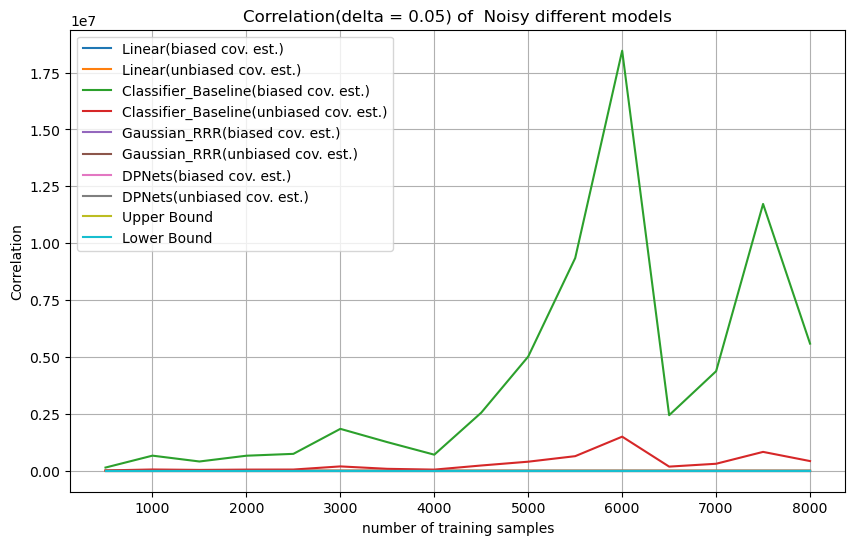

In [15]:
# Plot
plt.figure(figsize=(10, 6))

for model_name in transfer_operator_models:
    biased_est_mean = np.mean(biased_cov_ests[model_name], axis=-1)
    biased_est_std = np.std(biased_cov_ests[model_name], axis=-1)
    plt.plot(Ns, biased_est_mean, label=f"{model_name}(biased cov. est.)")
    plt.fill_between(Ns, biased_est_mean - biased_est_std, biased_est_mean + biased_est_std, alpha=0.2)

    unbiased_est_mean = np.mean(unbiased_cov_ests[model_name], axis=-1)
    unbiased_est_std = np.std(unbiased_cov_ests[model_name], axis=-1)
    plt.plot(Ns, unbiased_est_mean, label=f"{model_name}(unbiased cov. est.)")
    plt.fill_between(Ns, unbiased_est_mean - unbiased_est_std, unbiased_est_mean + unbiased_est_std, alpha=0.2)

plt.plot(Ns, np.ones((n_0,1)), label = 'Upper Bound',)
plt.plot(Ns, lower_bound[:,0], label = 'Lower Bound',)

plt.xlabel("number of training samples")
plt.ylabel("Correlation")
plt.title(f"Correlation(delta = {delta}) of  Noisy different models")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
biased_cov_ests['Linear'][:,0]

array([2014.88769531, 1995.95202637, 1946.12817383, 2078.55541992,
       1972.0501709 , 2021.78088379, 2066.21655273, 2089.40283203,
       2083.71850586, 2057.84936523, 2026.94702148, 2006.89147949,
       2002.67773438, 2011.51928711, 2029.69580078, 2018.51196289])

In [17]:
biased_cov_ests['Classifier_Baseline'][:,0]

array([  139115.15625,   662449.     ,   405782.625  ,   659551.125  ,
         741428.5625 ,  1840066.125  ,  1256049.5    ,   704957.0625 ,
        2551857.75   ,  5018097.5    ,  9345517.     , 18457866.     ,
        2440167.5    ,  4373794.5    , 11724011.     ,  5585647.5    ])

In [18]:
biased_cov_ests['DPNets'][:,0]

array([4.46095657, 4.57165527, 4.13795519, 4.5068326 , 4.39814615,
       4.64725256, 5.08009529, 4.44129753, 3.87189007, 4.93385363,
       4.72633457, 5.19250059, 5.13604403, 5.3178072 , 4.69013023,
       4.56026793])

In [19]:
biased_cov_ests['Gaussian_RRR'][:,0]

array([6.71513657e-06, 7.02216856e-06, 6.95221147e-06, 7.20394782e-06,
       7.23818845e-06, 7.25923534e-06, 7.34400133e-06, 7.27186928e-06,
       7.21479163e-06, 7.34593007e-06, 7.30232374e-06, 7.36777181e-06,
       7.35860448e-06, 7.38705940e-06, 7.40633698e-06, 7.38434860e-06])

In [20]:
lower_bound[:,0]

array([0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04])

In [21]:
1/lower_bound[:,0]

array([25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.,
       25., 25., 25.])